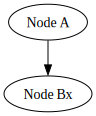

In [1]:
from graphviz import Digraph
from IPython.display import display, SVG

def display_graph():
    graph = Digraph('G', filename='graph.gv', format='svg', engine='dot')
    graph.node('A', 'Node A')
    graph.node('B', 'Node Bx')
    graph.edge('A', 'B')
    return graph

# Create the graph
graph = display_graph()

# Render the graph and display it in the notebook
display(SVG(graph.pipe().decode()))

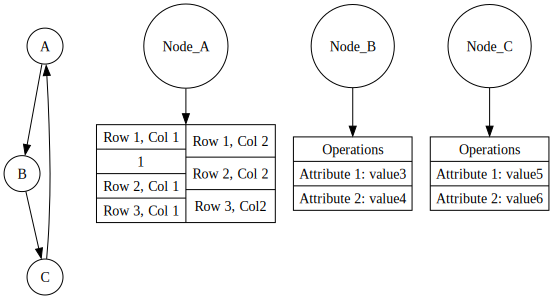

In [2]:
from graphviz import Source
dot_graph = """
digraph G {
    node [shape=circle];
    // rankdir=LR; // Set the layout direction to left-to-right

    A -> B;
    B -> C;
    C -> A;
    
    // Record-type nodes with associated attributes 
    A_label [shape=record, label="{Row 1, Col 1|1|Row 2, Col 1|Row 3, Col 1}|{Row 1, Col 2|Row 2, Col 2|Row 3, Col2}"];
    B_label [shape=record, label="{Operations|Attribute 1: value3|Attribute 2: value4}"];
    C_label [shape=record, label="{Operations|Attribute 1: value5|Attribute 2: value6}"];
 
    
    // Connections between nodes and corresponding record-type nodes
    Node_A -> A_label;
    Node_B -> B_label;
    Node_C -> C_label;
}
"""

# Create a Source object from the DOT format graph
source = Source(dot_graph, format='svg')

# Display the graph in the notebook
display(source)

In [3]:
import genai as ai

scraper = ai.Scraper();

Current Directory: /Users/raymondordona/Workspace/genaiproj/notebook


In [4]:
class MyTokenModel(ai.BPETokenizer):

   def __init__(self):
     super().__init__();


tokenizer = ai.BPETokenizer();



In [5]:
class MyModel(ai.BaseModel):

   def __init__(self):
     super().__init__();

     print("Creating a Graph!")
     graph = ai.Graph();

     print("Add Node 1 ...")
     embedding1 = [[1.0, 2.0, 3.0, 4.0], [3.0, 4.0, 5.0, 6.0]]
     node1 = graph.addNode("Node 1", ai.NodeType.Input, embedding1)
     node1.setOperations([ai.Encoder(heads=2, size=3, bias=True, type="leakyrelu", alpha=0.01)]);
     #node1.setOperations([ai.FeedForward(size=2, bias=True, type="leakyrelu", alpha=0.01)]);
     #node1.setOperations([ai.Attention(heads=1, size=2, bias=False), ai.Activation(type="leakyrelu", alpha=0.01)]);
     #node1.setOperations([ai.Linear(size=2, bias=True), ai.BatchNorm(), ai.Activation(type="leakyrelu", alpha=0.01)]);
     #node1.setOperations([ai.Linear(size=2, bias=True)]);

     print("Add Node 3 ...")
     node3 = graph.addNode("Node 3", ai.NodeType.Output)
     #node3.setOperations([ai.Linear(size=3, bias=True), ai.LayerNorm(), ai.Activation(type="leakyrelu", alpha=0.01)]) 
     node3.setOperations([ai.Linear(size=3, bias=True), ai.Activation(type="leakyrelu", alpha=0.01)]) 
     #node3.setOperations([ai.Linear(size=3, bias=True)]) 
     # embedding = [[1.0, 2.0, 3.0], [3.0, 4.0, 6.0]]
     # graph.setData(embedding);

     # assign to the instance
     self.graph = graph;
     self.node1 = node1
     self.node3 = node3

     print("Connect nodes ...");
     self.graph.connect(self.node1, self.node3);

     self.setGraph(self.graph);

model = MyModel();


Creating a Graph!
Add Node 1 ...
Add Node 3 ...
Connect nodes ...


In [6]:
target = [[1.0, 2.0, 3.0], [3.0, 4.0, 5.0]];
model.setTarget(target);
model.train(loss="mse", optimizer="adam", learnrate=0.01, iter=20);

Starting Iteration ...
-------> Compute Loss:4.67933 ... elapsed 0.002013 at Sun Jul 30 22:09:39 2023

-------> Compute Loss:4.54963 ... elapsed 0.00149 at Sun Jul 30 22:09:39 2023

-------> Compute Loss:4.41982 ... elapsed 0.082069 at Sun Jul 30 22:09:39 2023

-------> Compute Loss:4.2902 ... elapsed 0.002048 at Sun Jul 30 22:09:39 2023

-------> Compute Loss:4.16096 ... elapsed 0.001678 at Sun Jul 30 22:09:39 2023

-------> Compute Loss:4.03225 ... elapsed 0.001797 at Sun Jul 30 22:09:39 2023

-------> Compute Loss:3.90419 ... elapsed 0.002038 at Sun Jul 30 22:09:39 2023

-------> Compute Loss:3.77685 ... elapsed 0.001571 at Sun Jul 30 22:09:39 2023

-------> Compute Loss:3.65027 ... elapsed 0.001994 at Sun Jul 30 22:09:39 2023

-------> Compute Loss:3.51506 ... elapsed 0.001957 at Sun Jul 30 22:09:39 2023

-------> Compute Loss:3.37755 ... elapsed 0.001741 at Sun Jul 30 22:09:39 2023

-------> Compute Loss:3.23899 ... elapsed 0.001592 at Sun Jul 30 22:09:39 2023

-------> Compute Lo

In [7]:
mydot = model.graph.generateDotFormat()
mydot 

'digraph G {  node [shape=circle]; rankdir=LR; Node1; Node3; Node1->Node3;Node_1_label [shape=record, label="{* Encoder *}|{* MultiHeadAttention *}|{* Attention *}|{* Linear Transformation (Q) *}|{Weights|min=inf|max=nan}|{Biases|min=0.010000|max=0.010000}|{* Linear Transformation (K) *}|{Weights|min=inf|max=nan}|{Biases|min=0.010000|max=0.010000}|{* Linear Transformation (V) *}|{Weights|min=inf|max=nan}|{Biases|min=0.010000|max=0.010000}|{* Linear Transformation (Wo) *}|{Weights|min=inf|max=nan}|{Biases|min=0.010000|max=0.010000}|{* Layer Normalization (add_norm1) *}|{Shape|min=-0.670641|max=0.616399}|{Shift|min=-0.193060|max=0.204545}|{* FeedForward *}|{* Linear Transformation (L1) *}|{Weights|min=inf|max=nan}|{Biases|min=-0.170162|max=0.216108}|{* Activation (leakyrelu)*}|{dInput|min=-0.020994|max=0.018823}|{* Linear Transformation (L2) *}|{Weights|min=inf|max=nan}|{Biases|min=-0.191116|max=0.206539}|{* Layer Normalization (add_norm2) *}|{Shape|min=0.466932|max=0.938030}|{Shift|min=

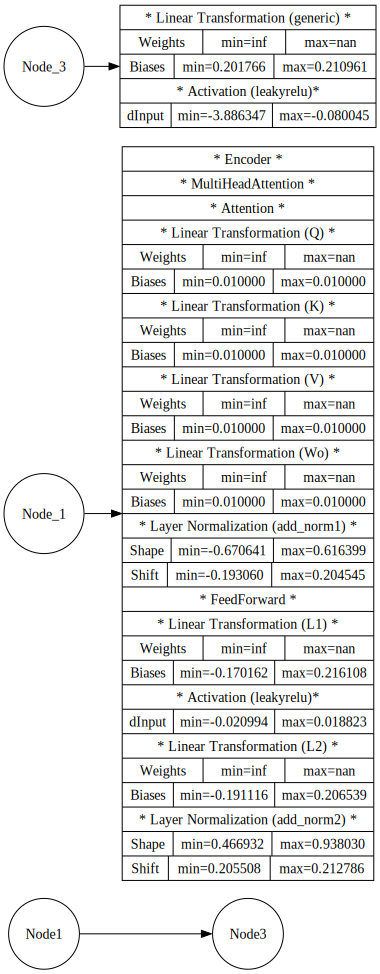

In [8]:
from graphviz import Source

# Create a Source object from the DOT format graph
source = Source(mydot, format='svg')

# Display the graph in the notebook
display(source)